<a href="https://colab.research.google.com/github/ella13162/DataScience/blob/main/Week_6_SeminarActivity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import io
uploaded = files.upload()

Saving pima_indians_diabetes.csv to pima_indians_diabetes.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('pima_indians_diabetes.csv')

In [ ]:
df

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
print(df.shape)

print(df.dtypes)
df.info()

(768, 9)
preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
headers = df.columns.tolist()
print(headers)

features = headers[:-2]
print(features)

['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi']


In [ ]:
diabetes_count = df.groupby('class').size()
print(diabetes_count)

diabetes_count = diabetes_count.tolist()
print(diabetes_count)

class
0    500
1    268
dtype: int64
[500, 268]


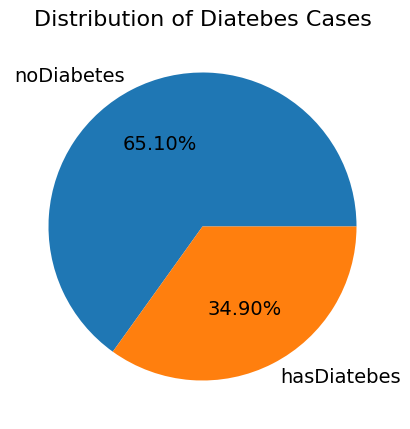

In [ ]:
fig_1 = plt.figure(figsize=(5,5))

plt.pie(diabetes_count, labels=['noDiabetes', 'hasDiatebes'], autopct='%.2f%%', textprops={'fontsize': 14})

plt.title('Distribution of Diatebes Cases', fontsize=16)

plt.show()

preg       Axes(0.125,0.53;0.168478x0.35)
plas    Axes(0.327174,0.53;0.168478x0.35)
pres    Axes(0.529348,0.53;0.168478x0.35)
skin    Axes(0.731522,0.53;0.168478x0.35)
test       Axes(0.125,0.11;0.168478x0.35)
mass    Axes(0.327174,0.11;0.168478x0.35)
pedi    Axes(0.529348,0.11;0.168478x0.35)
dtype: object

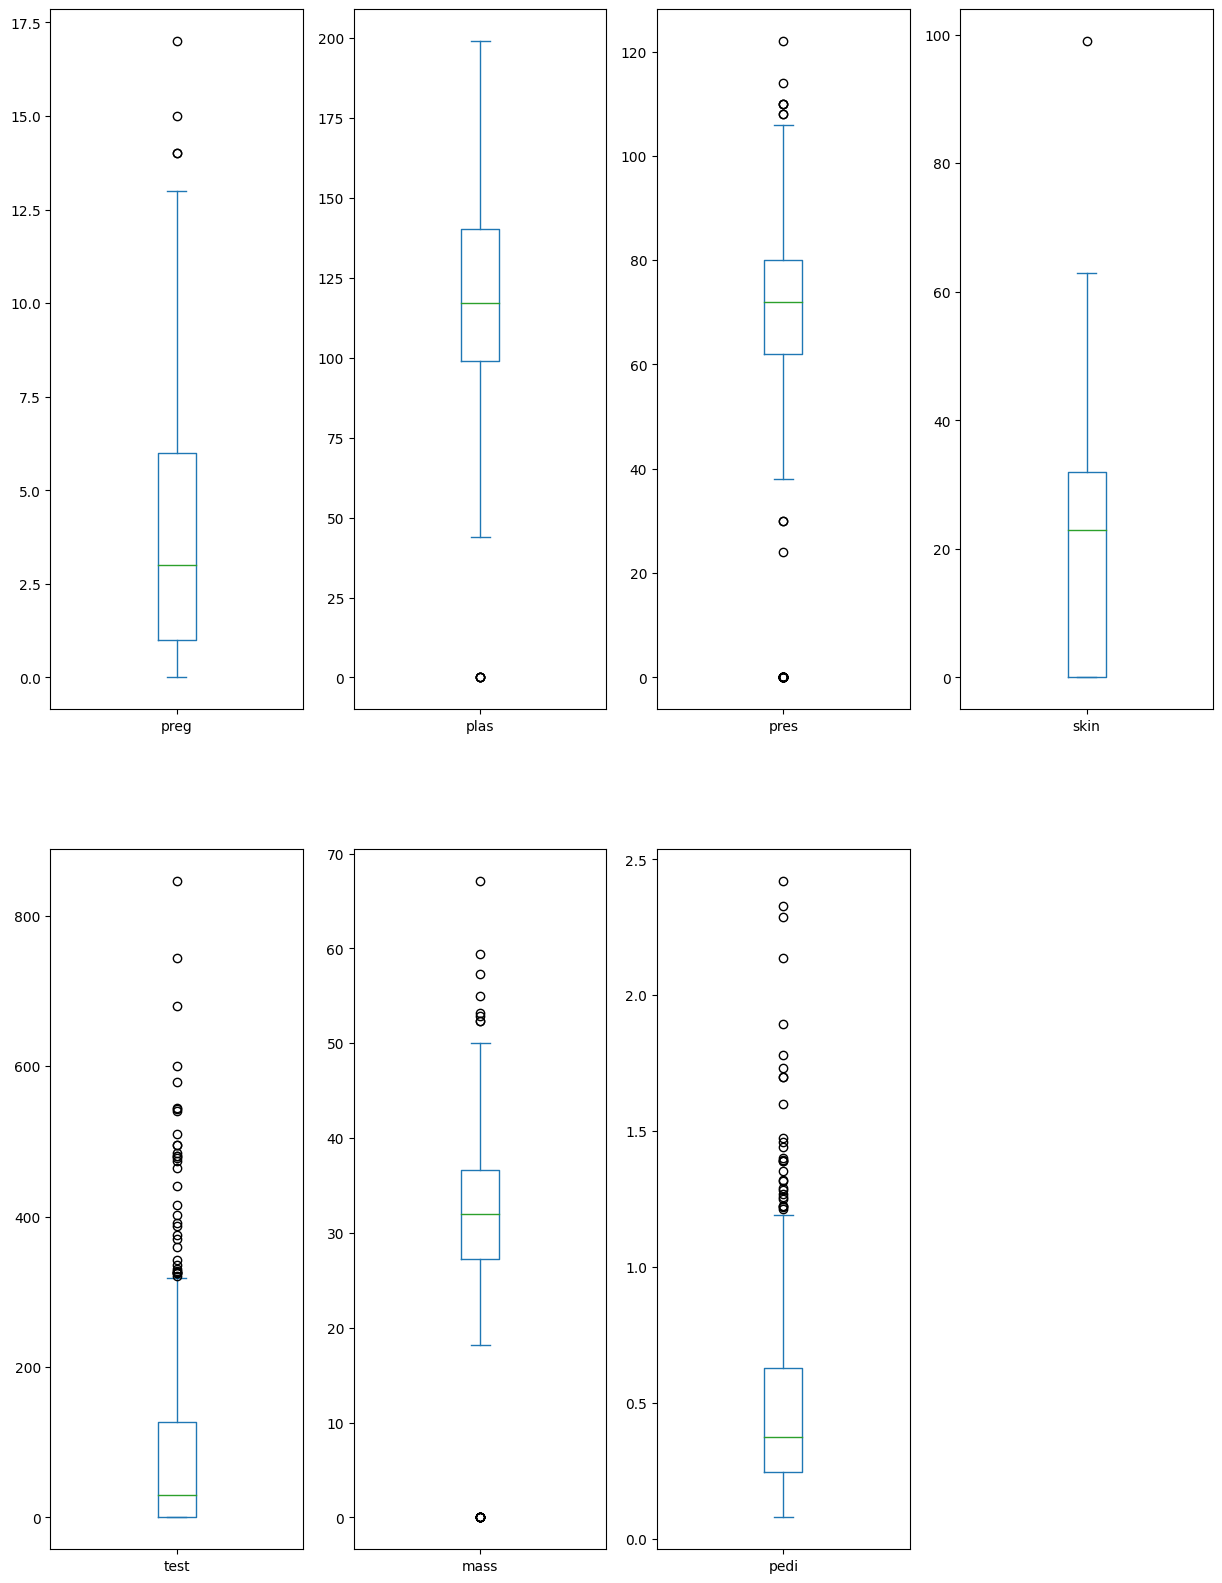

In [ ]:
df.loc[:, features].plot(kind='box', subplots=True, figsize=(15,20), layout=(2,4), sharex=False)

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

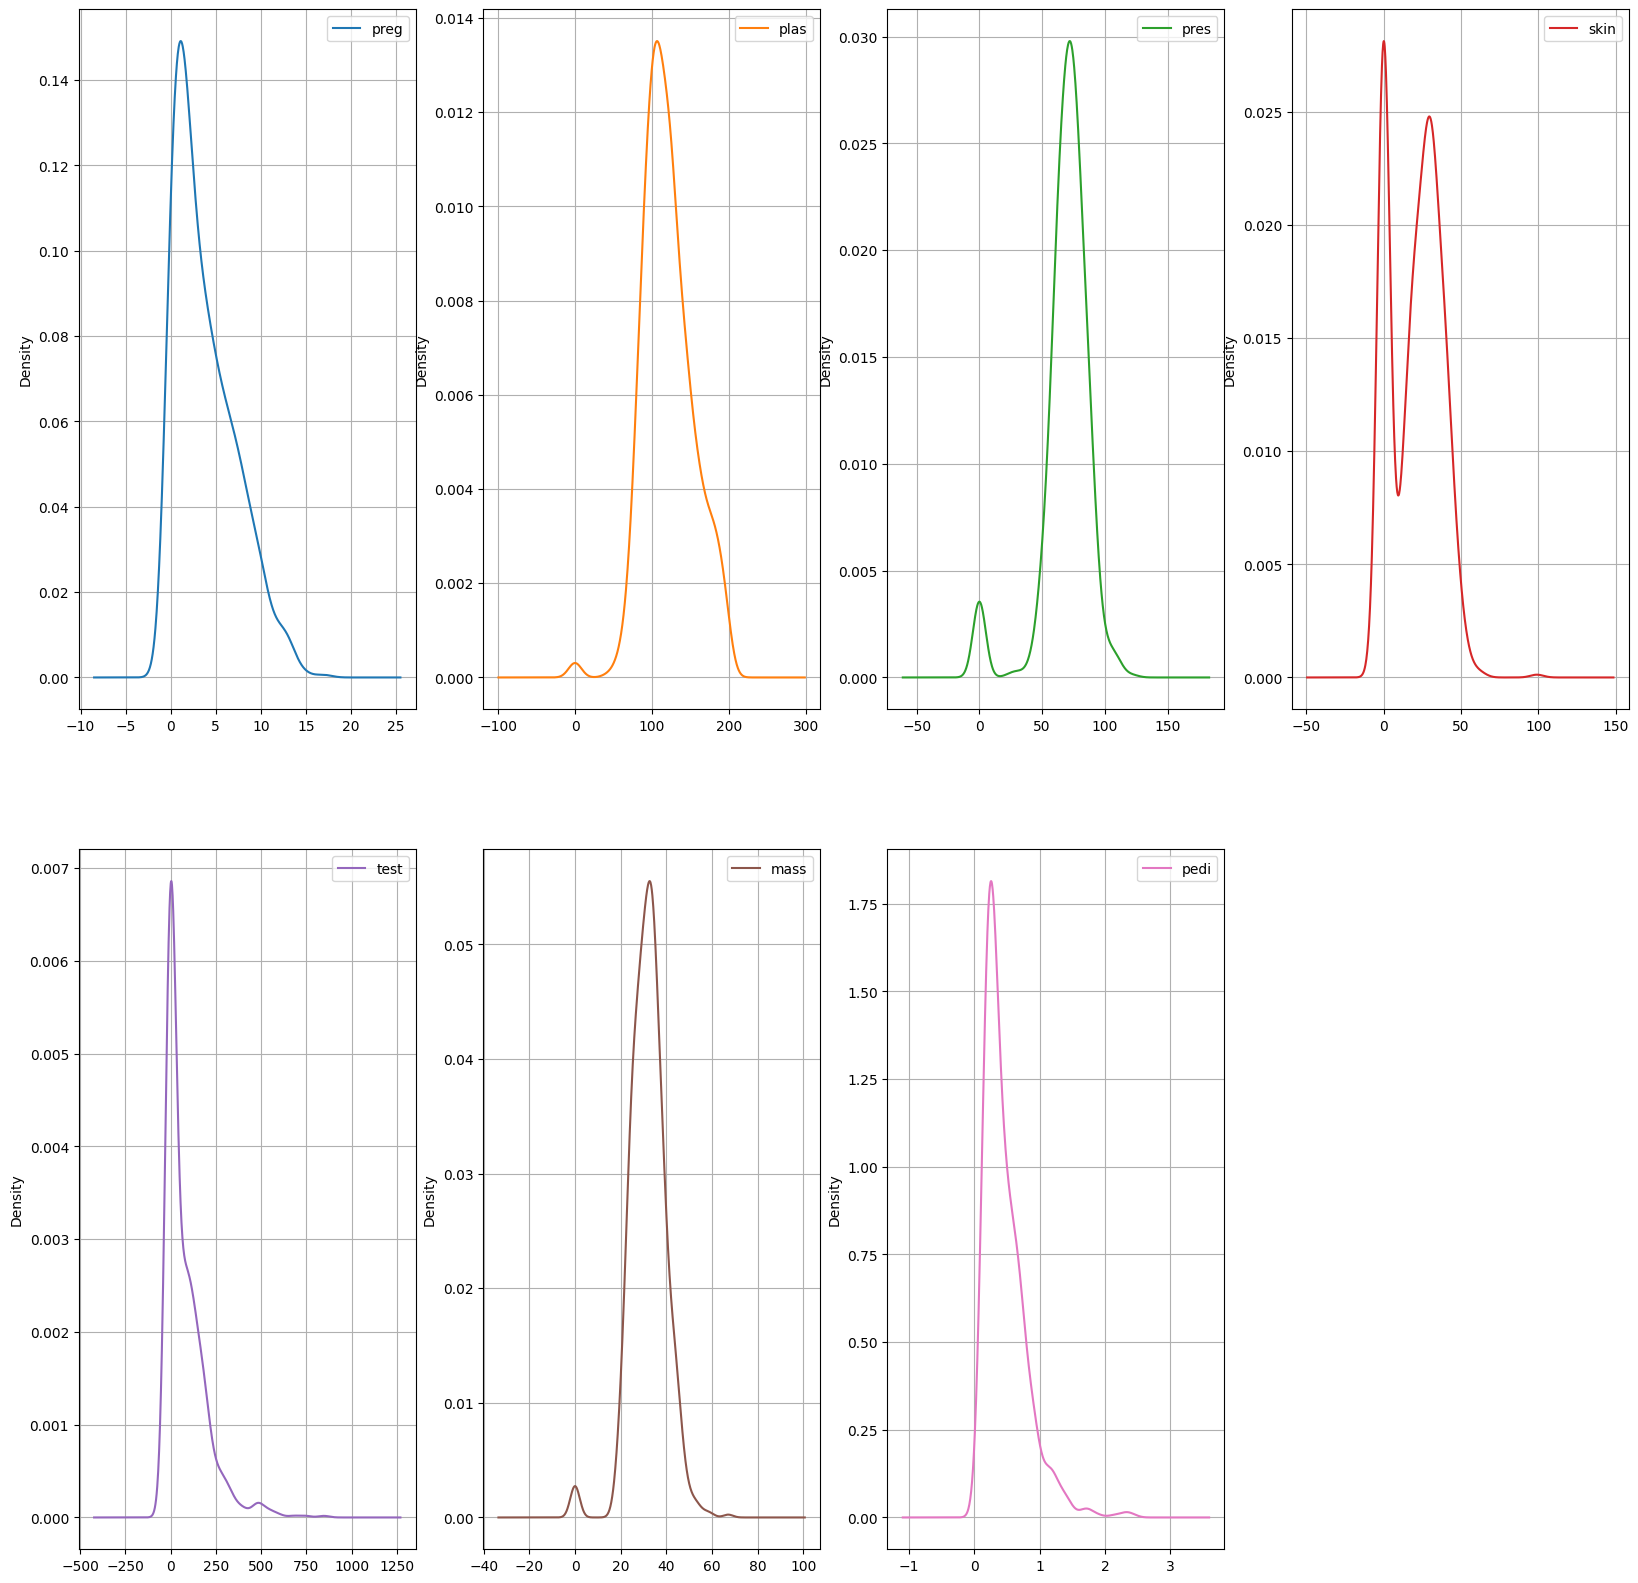

In [ ]:
df.loc[:, features].plot(kind='density', subplots=True, layout=(2,4), figsize=(20,20), sharex=False, grid=True)

           preg      plas      pres      skin      test      mass      pedi  \
preg   1.000000  0.129459  0.141282 -0.081672 -0.073535  0.017683 -0.033523   
plas   0.129459  1.000000  0.152590  0.057328  0.331357  0.221071  0.137337   
pres   0.141282  0.152590  1.000000  0.207371  0.088933  0.281805  0.041265   
skin  -0.081672  0.057328  0.207371  1.000000  0.436783  0.392573  0.183928   
test  -0.073535  0.331357  0.088933  0.436783  1.000000  0.197859  0.185071   
mass   0.017683  0.221071  0.281805  0.392573  0.197859  1.000000  0.140647   
pedi  -0.033523  0.137337  0.041265  0.183928  0.185071  0.140647  1.000000   
age    0.544341  0.263514  0.239528 -0.113970 -0.042163  0.036242  0.033561   
class  0.221898  0.466581  0.065068  0.074752  0.130548  0.292695  0.173844   

            age     class  
preg   0.544341  0.221898  
plas   0.263514  0.466581  
pres   0.239528  0.065068  
skin  -0.113970  0.074752  
test  -0.042163  0.130548  
mass   0.036242  0.292695  
pedi   0.0335

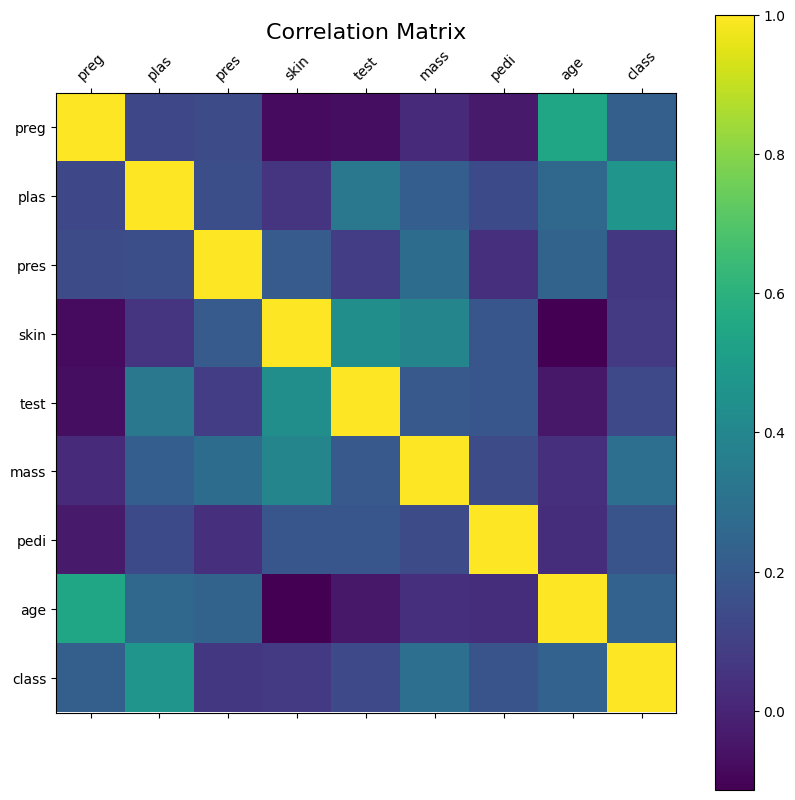

In [ ]:
correlation = df.corr(method='pearson')
print(correlation)

fig_2 = plt.figure(figsize=(10,10))

plt.matshow(correlation, fignum=fig_2.number)

plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=10, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=10)

cb = plt.colorbar()

cb.ax.tick_params(labelsize=10)
plt.title('Correlation Matrix', fontsize=16);